In [ ]:
import scgen
import scanpy as sc 

### Reading the  train data

In [ ]:
train = sc.read("./tests/data/pancreas.h5ad",
                backup_url="https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1")

We need two observation labels "batch" and "cell_type" for our batch_removal procedure.
There exist a "batch" obs but no "cell_type", 
so we add it as a .obs of adata

In [ ]:
train.obs["cell_type"] = train.obs["celltype"].tolist()

### UMAP Visualization of the  original uncorrected data  

In [ ]:
sc.pp.neighbors(train)
sc.tl.umap(train)

In [ ]:
sc.pl.umap(train, color=["batch", "cell_type"], wspace=.5, frameon=False)

### Creating and training the model

In [ ]:
network = scgen.VAEArith(x_dimension= train.shape[1], model_path="./models/batch" )

We train the model for 10 epochs 

In [ ]:
network.train(train_data=train, n_epochs=100)

### Batch Removal

Now, we pass our train (uncorected) adata and network object to batch_removal fucntion which
returns adata of batch corrected data

In [ ]:
corrected_adata =  scgen.batch_removal(network, train, batch_key="batch", cell_label_key="cell_type")

###  Visualization of the  corrected data

In [11]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

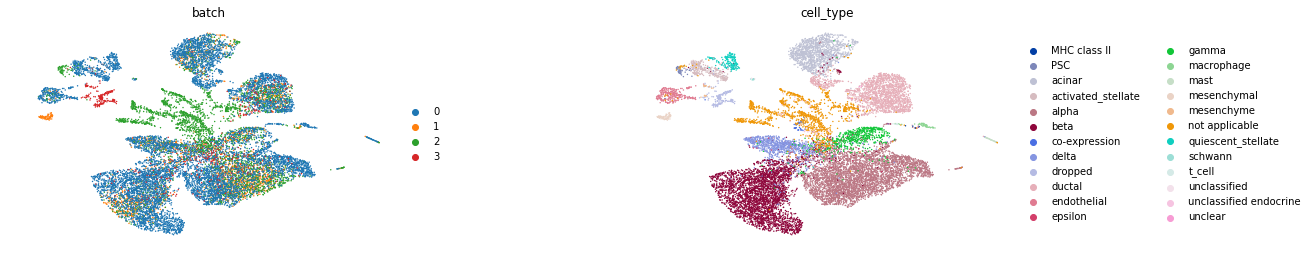

In [13]:
sc.pl.umap(corrected_adata, color=["batch", "cell_type"], wspace=.5, frameon=False)

####  Using uncorrected data

Note that original uncorrected for the adata is saved to `corrected_adata.raw` and you can use that for fruther analaysis

In [23]:
corrected_adata.raw

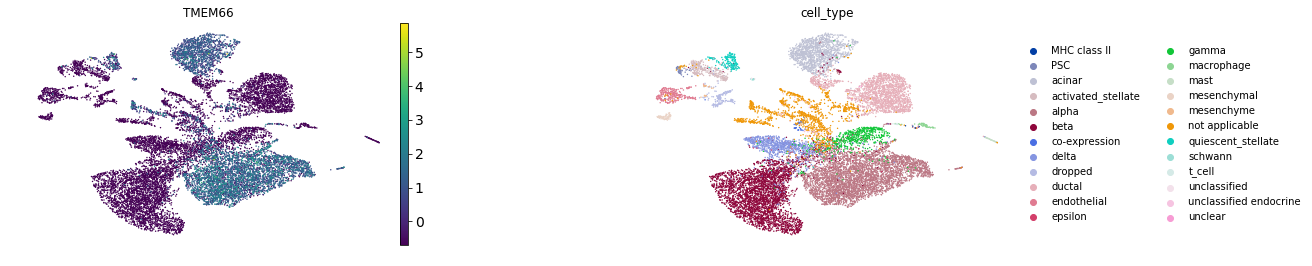

In [26]:
sc.pl.umap(corrected_adata, color=["TMEM66", "cell_type"], wspace=.5, frameon=False, use_raw=True)